In [1]:
import pandas as pd

df = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")  # Fix encoding issue
print(df.head())  # Check the first few rows
print(df.info())  # Check data types and missing values


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225826 entries, 0 to 225825
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [2]:
df.dropna(inplace=True)  # Remove missing values
df.drop_duplicates(inplace=True)  # Remove duplicate records
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])  # Convert to datetime


In [3]:
df_country_sales = df.groupby("Country")["Quantity"].sum().reset_index()
print(df_country_sales)


                 Country   Quantity
0              Australia    34258.0
1                Austria     2114.0
2                Bahrain      260.0
3                Belgium     9448.0
4                 Brazil      356.0
5                 Canada      592.0
6        Channel Islands     3692.0
7                 Cyprus     4607.0
8         Czech Republic      307.0
9                Denmark     2718.0
10                  EIRE    42526.0
11    European Community      162.0
12               Finland     5482.0
13                France    45786.0
14               Germany    50192.0
15                Greece     1077.0
16               Iceland     1313.0
17                Israel      230.0
18                 Italy     3159.0
19                 Japan    15192.0
20               Lebanon      386.0
21             Lithuania      652.0
22                 Malta      378.0
23           Netherlands    83710.0
24                Norway     3967.0
25                Poland     1919.0
26              Portugal    

In [4]:
import sqlite3

conn = sqlite3.connect(":memory:")
df.to_sql("retail", conn, index=False, if_exists="replace")

query = """
SELECT CustomerID, SUM(Quantity * UnitPrice) AS TotalSpent
FROM retail
GROUP BY CustomerID
ORDER BY TotalSpent DESC
LIMIT 5;
"""

top_customers = pd.read_sql(query, conn)
print(top_customers)


   CustomerID  TotalSpent
0     14646.0   116090.92
1     18102.0   106443.34
2     17450.0    54602.44
3     12415.0    50290.20
4     14156.0    42289.10


<ipython-input-5-cf1dc0da57ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


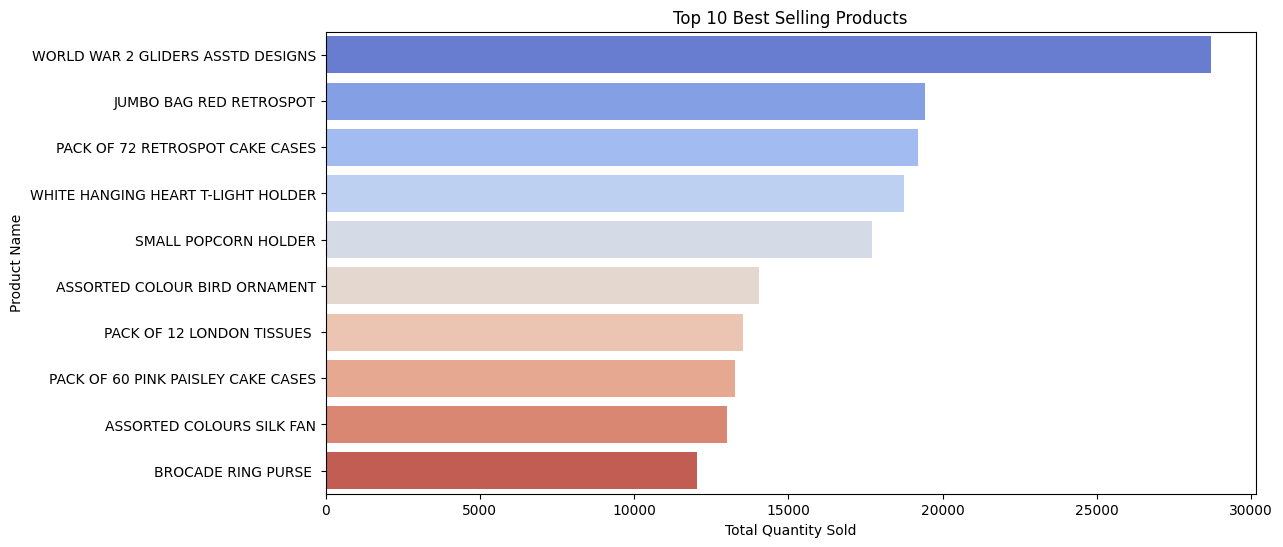

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

top_products = df.groupby("Description")["Quantity"].sum().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 10 Best Selling Products")
plt.show()
